# Skeleton test
author: Pranathi
date: 2015.11.30

converting a 3D/2D skeleton to a graph using networkx.
Goal : 
To change this graph to a graph without unnecessary cliques
Count number of branches


In [6]:
import datetime
print("------------------------------------=======================\n| This notebook was last updated on:  ", end="")
print("%s\n------------------------------------=======================\n" % datetime.datetime.now().strftime("%Y-%m-%d, %H:%M:%S"))

------------------------------------=======================
| This notebook was last updated on:  2016-01-05, 13:21:40
------------------------------------=======================



In [7]:
# do the basic setup for the workspace
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir(os.path.join(os.path.expanduser("~"), '3scan-skeleton'))
print(os.getcwd())
import time
import itertools
import networkx as nx
from skimage.morphology import skeletonize as getSkeletonize2D

from skeleton.networkxGraphFromarray import getNetworkxGraphFromarray
from tests.tests3DSkeletonize import getDonut

from matplotlib.pyplot import imshow
from skeleton.cliqueRemovig import removeCliqueEdges

/home/pranathi/3scan-skeleton


In [8]:
from skeleton.segmentLengths import getSegmentsAndLengths

In [9]:
##### create small skeleton a cycle with 2 protrusions
frame = np.zeros((10, 10), dtype=np.uint8)

frame[2:-2, 2:-2] = 1
frame[4:-4, 4:-4] = 0
frame=getSkeletonize2D(frame)
frame[1, 5] =1; frame[7, 5] = 1;
sampleImage = np.zeros((3, 10, 10), dtype=np.uint8)
sampleImage[1] = frame
sampleImage

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [10]:
# sample line with no cycles 
# expected number of branches = 1
# expected number of cycles = 0
# expected number of disjointgraphs = 1
sampleLine = np.zeros((5, 5, 5), dtype=np.uint8)
sampleLine[1, :, 4] = 1
sampleGraph = getNetworkxGraphFromarray(sampleImage, True)
removeCliqueEdges(sampleGraph)
print(nx.is_biconnected(sampleGraph))
lineGraph = getNetworkxGraphFromarray(sampleLine, True)
CLIQUES = nx.find_cliques_recursive(lineGraph)
len(list(CLIQUES))

adjacent list calculation for all nodes took 0.0009102821350097656 seconds
time taken to remove cliques is 0.00027942657470703125 seconds
False
adjacent list calculation for all nodes took 0.0004105567932128906 seconds


4

number of pixels removed in the 0 direction is 89
number of pixels removed in the 1 direction is 9
number of pixels removed in the 2 direction is 19
number of pixels removed in the 3 direction is 6
number of pixels removed in the 4 direction is 10
number of pixels removed in the 5 direction is 3
number of pixels removed in the 6 direction is 2
number of pixels removed in the 7 direction is 1
number of pixels removed in the 8 direction is 0
number of pixels removed in the 9 direction is 0
number of pixels removed in the 10 direction is 0
number of pixels removed in the 11 direction is 0
number of pixels removed in pass 0 is 139
number of pixels removed in the 0 direction is 0
number of pixels removed in the 1 direction is 0
number of pixels removed in the 2 direction is 0
number of pixels removed in the 3 direction is 0
number of pixels removed in the 4 direction is 0
number of pixels removed in the 5 direction is 0
number of pixels removed in the 6 direction is 0
number of pixels remov

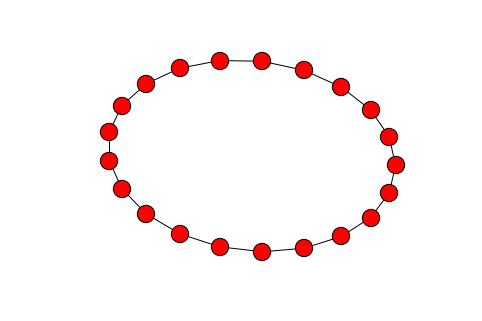

In [11]:
# sample donut which is skeletonized to a ring having a single cycle
# expected number of branches = 1
# expected number of cycles = 1
# expected number of disjointgraphs = 1
donut = getDonut()
donutGraph = getNetworkxGraphFromarray(donut, False)
removeCliqueEdges(donutGraph)
nx.draw_spectral(donutGraph)

adjacent list calculation for all nodes took 0.0006282329559326172 seconds


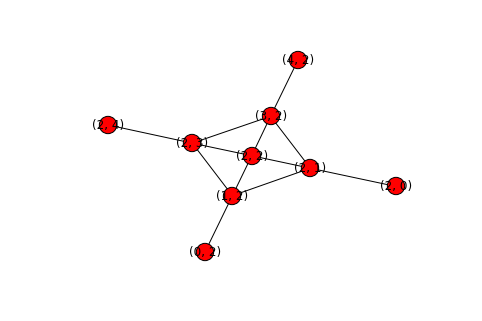

In [12]:
cros = np.zeros((5, 5), dtype=np.uint8)
cros[:,2] = 1
cros[2, :] = 1
crosGraph = getNetworkxGraphFromarray(cros, True)
nx.draw(crosGraph, with_labels = True)

time taken to remove cliques is 0.0005595684051513672 seconds


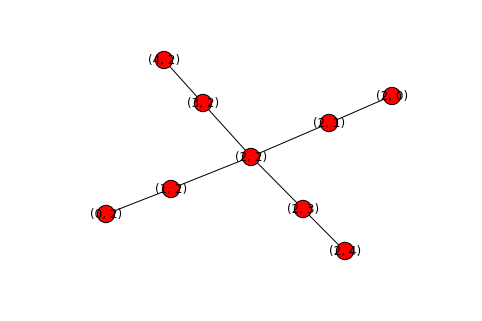

In [13]:
removeCliqueEdges(crosGraph)
nx.draw(crosGraph, with_labels = True)

adjacent list calculation for all nodes took 0.0007996559143066406 seconds


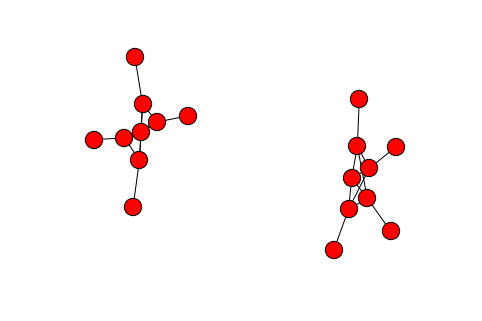

In [14]:
crosPair = np.zeros((10,10,10),dtype=np.uint8)
crosPair[0, 0:5, 0:5] = cros
crosPair[5,5:10, 5:10] = cros
crosPairgraph = getNetworkxGraphFromarray(crosPair, True)
nx.draw(crosPairgraph)

time taken to remove cliques is 0.002420663833618164 seconds


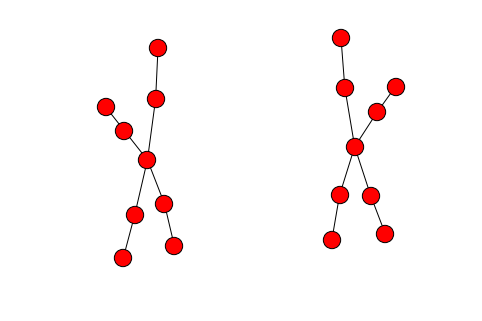

In [15]:
removeCliqueEdges(crosPairgraph)
nx.draw(crosPairgraph)

adjacent list calculation for all nodes took 0.0019314289093017578 seconds
cycles 9
time taken to remove cliques is 0.00036907196044921875 seconds
cycles 1


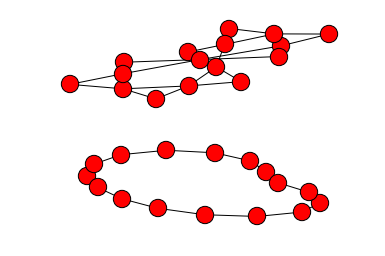

In [16]:
hillbert = np.array([[[1, 1, 1],
                      [1, 0, 1],
                      [1, 0, 1]],
                     [[0, 0, 0],
                      [0, 0, 0],
                      [1, 0, 1]],
                     [[1, 1, 1],
                      [1, 0, 1],
                      [1, 0, 1]]], dtype=bool)
loopGraph = getNetworkxGraphFromarray(hillbert, True)
print("cycles", len(nx.cycle_basis(loopGraph)))
plt.subplot(2,1,1)
nx.draw(loopGraph)
removeCliqueEdges(loopGraph)
print("cycles", len(nx.cycle_basis(loopGraph)))
plt.subplot(2,1,2)
nx.draw(loopGraph)

adjacent list calculation for all nodes took 0.0005838871002197266 seconds
time taken to remove cliques is 0.00035119056701660156 seconds


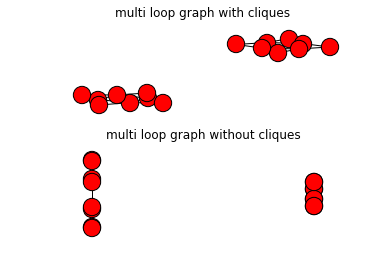

In [17]:
tinyLoop = np.array([[1, 1, 1],
                     [1, 0, 1],
                     [1, 1, 1]], dtype=bool)
multiLoop = np.zeros((25, 25), dtype=bool)
multiLoop[2:5, 2:5] = tinyLoop
multiLoop[7:10, 7:10] = tinyLoop
multiloopgraph = getNetworkxGraphFromarray(multiLoop, True)
plt.subplot(2, 1, 1)
plt.title("multi loop graph with cliques")
nx.draw(multiloopgraph)
removeCliqueEdges(multiloopgraph)
plt.subplot(2,1,2)
plt.title("multi loop graph without cliques")
nx.draw_spectral(multiloopgraph)

In [18]:
dlinecount, dlinelength, segmentTortuosityline, totalSegmentsLine  = getSegmentsAndLengths(lineGraph)
assert totalSegmentsLine == 1
dcyclecount, dcyclelength, segmentTortuositycycle, totalSegmentsDonut  = getSegmentsAndLengths(donutGraph)
assert totalSegmentsDonut == 1
ddisjointCyclescount, ddisjointCycleslength, segmentTortuositycycles, totalSegmentsDisjointCycles  = getSegmentsAndLengths(multiloopgraph)
assert totalSegmentsDisjointCycles == 2
dTreecount, dTreelength, segmentTortuositytree, totalSegmentsTree  = getSegmentsAndLengths(crosGraph)
assert totalSegmentsTree == 4
dTreescount, dTreeslength, segmentTortuositytrees, totalSegmentsTrees  = getSegmentsAndLengths(crosPairgraph)
assert totalSegmentsTrees == 7
dcycleTreecount, dcycleTreelength, segmentTortuositycycletree, totalSegmentsSampleGraph = getSegmentsAndLengths(sampleGraph)
assert totalSegmentsSampleGraph == 4
dcyclesTouchcount, dcyclesTouchlength, segmentTortuositycyclesTouch, totalSegmentsCyclestouch  = getSegmentsAndLengths(loopGraph)
assert totalSegmentsCyclestouch == 1

sorting 5 number of nodes
line segment with no tree structure
sorting 5 number of nodes
 in _getDistanceBetweenPointsInpath function
time taken in 0 disjoint graph is 0.00019049644470214844 seconds
time taken to calculate segments and their lengths is 0.0004105567932128906 seconds 1
sorting 21 number of nodes
1 cycle in disjoint graph and no other components
number of cycles in the graph is 1
 in _getDistanceBetweenPointsInpath function
time taken in 0 disjoint graph is 0.00043654441833496094 seconds
time taken to calculate segments and their lengths is 0.0009562969207763672 seconds 1
sorting 8 number of nodes
1 cycle in disjoint graph and no other components
number of cycles in the graph is 1
 in _getDistanceBetweenPointsInpath function
time taken in 0 disjoint graph is 0.00022339820861816406 seconds
time taken to calculate segments and their lengths is 0.0006632804870605469 seconds 1
sorting 8 number of nodes
1 cycle in disjoint graph and no other components
number of cycles in the g

AssertionError: 

In [ ]:
segmentTortuositycycletree

In [ ]:
dcycleTreelength

In [ ]:
totalSegmentsSampleGraph

In [ ]:
dcyclesTouchcount

In [ ]:
dTreescount

In [ ]:
totalSegmentsSampleGraph

In [ ]:
dcycleTreecount

In [ ]:
dTreecount

In [ ]:
dTreeslength